In [1]:
import pandas as pd
from tqdm import tqdm

In [2]:
!ls results

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
GENETIC_REULSTS = "./results/genetic_solver_results.csv"
HILL_CLIMBING = "./results/hill_climbing_solver_results.csv"
SIMULATED_ANN = "./results/simulated_annealing2.csv"

In [4]:
res = pd.read_csv(GENETIC_REULSTS)
res["solver"] = "genetic"

res2 = pd.read_csv(HILL_CLIMBING)
res2["solver"] = "hill_climbing"
res = res.append(res2)

res3 = pd.read_csv(SIMULATED_ANN)
res3["solver"] = "sa"

res4 = pd.read_csv("./res.csv")
res4["solver"] = "-"
res = res.append(res3)
res = res.append(res4)
res

,minute,base_path,instance,intervention_size,resources_size,exclusion_size,scenarious_size,population_size,mutation_rate,crossover_rate,time_limit,error,is_solved,solver
0,1,./A_set/A_,9,18,10,0,17,25.0,0.01,0.85,15,1507.970,1,genetic
1,1,./A_set/A_,7,36,9,3,17,25.0,0.01,0.85,15,2277.970,1,genetic
2,1,./A_set/A_,12,54,10,0,53,25.0,0.01,0.85,15,800.996,1,genetic
3,1,./A_set/A_,10,108,9,40,53,25.0,0.01,0.85,15,3019.960,1,genetic
4,1,./A_set/A_,8,18,9,4,17,25.0,0.01,0.85,15,745.575,1,genetic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12927,11,./B_set_rounded/B_,13,99,9,4,102,50.0,0.05,1.00,15,10.000,0,-
12928,12,./B_set_rounded/B_,13,99,9,4,102,50.0,0.05,1.00,15,10.000,0,-
12929,13,./B_set_rounded/B_,13,99,9,4,102,50.0,0.05,1.00,15,10.000,0,-
12930,14,./B_set_rounded/B_,13,99,9,4,102,50.0,0.05,1.00,15,10.000,0,-


In [5]:
res.loc[(res.solver == "-") & (res.crossover_rate == 1600), "solver"] = "sa"
res.loc[(res.solver == "-") & (res.crossover_rate == 1), "solver"] = "genetic"
res.loc[(res.solver == "-") & (res.crossover_rate == -1), "solver"] = "hill_climbing"


In [6]:
res.rename(columns={"population_size": "param1", "mutation_rate": "param2", "crossover_rate": "param3"}, inplace=True)

In [7]:
res.loc[res["base_path"] == "./A_set/A_", "base_path"] = "A"
res.loc[res["base_path"] != "A", "base_path"] = "B"
res["FILE"] = res["base_path"]+res["instance"].astype(str)
res = res[res["FILE"] != "B15"]
res.head()

,minute,base_path,instance,intervention_size,resources_size,exclusion_size,scenarious_size,param1,param2,param3,time_limit,error,is_solved,solver,FILE
0,1,A,9,18,10,0,17,25.0,0.01,0.85,15,1507.970,1,genetic,A9
1,1,A,7,36,9,3,17,25.0,0.01,0.85,15,2277.970,1,genetic,A7
2,1,A,12,54,10,0,53,25.0,0.01,0.85,15,800.996,1,genetic,A12
3,1,A,10,108,9,40,53,25.0,0.01,0.85,15,3019.960,1,genetic,A10
4,1,A,8,18,9,4,17,25.0,0.01,0.85,15,745.575,1,genetic,A8


### Algorithms solved statistics

In [8]:
for solver in res.solver.unique():
    print(f'======={solver}==========')
    res_count = res[(res.solver == solver) & (res.minute == 15)]
    print(f'Percentage of solved runs: {res_count.is_solved.value_counts()[1]}')
    print(f'Percentage of solved runs for A set (easy files): {res_count[res_count.base_path == "A"].is_solved.value_counts(normalize=True)[1]}')
    print(f'Percentage of solved runs for B set (hard files): {res_count[res_count.base_path == "B"].is_solved.value_counts(normalize=True)[1]}')
    print(f'Count of A set instances for which solution exists {len(res_count[(res_count.base_path == "A") & (res_count.is_solved == 1)].FILE.unique())}')
    print(f'Count of B set instances for which solution exists {len(res_count[(res_count.base_path == "B") & (res_count.is_solved == 1)].FILE.unique())}')

=======genetic==========
Percentage of solved runs: 681
Percentage of solved runs for A set (easy files): 0.9285714285714286
Percentage of solved runs for B set (hard files): 0.16382252559726962
Count of A set instances for which solution exists 14
Count of B set instances for which solution exists 3
=======hill_climbing==========
Percentage of solved runs: 997
Percentage of solved runs for A set (easy files): 0.9653846153846154
Percentage of solved runs for B set (hard files): 0.3370165745856354
Count of A set instances for which solution exists 15
Count of B set instances for which solution exists 9
=======sa==========
Percentage of solved runs: 808
Percentage of solved runs for A set (easy files): 0.9377777777777778
Percentage of solved runs for B set (hard files): 0.27910685805422647
Count of A set instances for which solution exists 15
Count of B set instances for which solution exists 4


### first clean the dirty generated csv file

In [9]:
res

,minute,base_path,instance,intervention_size,resources_size,exclusion_size,scenarious_size,param1,param2,param3,time_limit,error,is_solved,solver,FILE
0,1,A,9,18,10,0,17,25.0,0.01,0.85,15,1507.970,1,genetic,A9
1,1,A,7,36,9,3,17,25.0,0.01,0.85,15,2277.970,1,genetic,A7
2,1,A,12,54,10,0,53,25.0,0.01,0.85,15,800.996,1,genetic,A12
3,1,A,10,108,9,40,53,25.0,0.01,0.85,15,3019.960,1,genetic,A10
4,1,A,8,18,9,4,17,25.0,0.01,0.85,15,745.575,1,genetic,A8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12927,11,B,13,99,9,4,102,50.0,0.05,1.00,15,10.000,0,genetic,B13
12928,12,B,13,99,9,4,102,50.0,0.05,1.00,15,10.000,0,genetic,B13
12929,13,B,13,99,9,4,102,50.0,0.05,1.00,15,10.000,0,genetic,B13
12930,14,B,13,99,9,4,102,50.0,0.05,1.00,15,10.000,0,genetic,B13


In [10]:
INF = 99999
res["schedule_error"] = res.apply(lambda x: x["error"] if x["is_solved"] else INF, axis=1)
res["constraint_error"] = res.apply(lambda x: x["error"] if not x["is_solved"] else 0, axis=1)

res["constraint_error"] = res["constraint_error"].apply(lambda x: min(x, 1000))
res["config"] = res["param1"].astype(str) + " " + res["param2"].astype(str) + " " + res["param3"].astype(str) + " " + res["minute"].astype(str)

res = res.drop(labels=["score", "error"], axis=1, errors="ignore")
res

<ipython-input-10-132767f35e43>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res["schedule_error"] = res.apply(lambda x: x["error"] if x["is_solved"] else INF, axis=1)
<ipython-input-10-132767f35e43>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res["constraint_error"] = res.apply(lambda x: x["error"] if not x["is_solved"] else 0, axis=1)
<ipython-input-10-132767f35e43>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

,minute,base_path,instance,intervention_size,resources_size,exclusion_size,scenarious_size,param1,param2,param3,time_limit,is_solved,solver,FILE,schedule_error,constraint_error,config
0,1,A,9,18,10,0,17,25.0,0.01,0.85,15,1,genetic,A9,1507.970,0.0,25.0 0.01 0.85 1
1,1,A,7,36,9,3,17,25.0,0.01,0.85,15,1,genetic,A7,2277.970,0.0,25.0 0.01 0.85 1
2,1,A,12,54,10,0,53,25.0,0.01,0.85,15,1,genetic,A12,800.996,0.0,25.0 0.01 0.85 1
3,1,A,10,108,9,40,53,25.0,0.01,0.85,15,1,genetic,A10,3019.960,0.0,25.0 0.01 0.85 1
4,1,A,8,18,9,4,17,25.0,0.01,0.85,15,1,genetic,A8,745.575,0.0,25.0 0.01 0.85 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12927,11,B,13,99,9,4,102,50.0,0.05,1.00,15,0,genetic,B13,99999.000,10.0,50.0 0.05 1.0 11
12928,12,B,13,99,9,4,102,50.0,0.05,1.00,15,0,genetic,B13,99999.000,10.0,50.0 0.05 1.0 12
12929,13,B,13,99,9,4,102,50.0,0.05,1.00,15,0,genetic,B13,99999.000,10.0,50.0 0.05 1.0 13
12930,14,B,13,99,9,4,102,50.0,0.05,1.00,15,0,genetic,B13,99999.000,10.0,50.0 0.05 1.0 14


In [11]:
res['config_full'] = res['config'] + '_' + res['FILE']
res.head()

,minute,base_path,instance,intervention_size,resources_size,exclusion_size,scenarious_size,param1,param2,param3,time_limit,is_solved,solver,FILE,schedule_error,constraint_error,config,config_full
0,1,A,9,18,10,0,17,25.0,0.01,0.85,15,1,genetic,A9,1507.970,0.0,25.0 0.01 0.85 1,25.0 0.01 0.85 1_A9
1,1,A,7,36,9,3,17,25.0,0.01,0.85,15,1,genetic,A7,2277.970,0.0,25.0 0.01 0.85 1,25.0 0.01 0.85 1_A7
2,1,A,12,54,10,0,53,25.0,0.01,0.85,15,1,genetic,A12,800.996,0.0,25.0 0.01 0.85 1,25.0 0.01 0.85 1_A12
3,1,A,10,108,9,40,53,25.0,0.01,0.85,15,1,genetic,A10,3019.960,0.0,25.0 0.01 0.85 1,25.0 0.01 0.85 1_A10
4,1,A,8,18,9,4,17,25.0,0.01,0.85,15,1,genetic,A8,745.575,0.0,25.0 0.01 0.85 1,25.0 0.01 0.85 1_A8


In [12]:
for ind in res.index:
    row = res.iloc[ind]
    if row['solver'] != 'sa' or row.minute == 1:
        continue
    
    solved = row['is_solved']
    if not row['is_solved'] and len(res[(res.config_full == row.config_full) & (res.minute < row.minute) & (res.is_solved)]) != 0:
        res.loc[ind, 'is_solved'] = 1
        res.loc[ind, 'constraint_error'] = 0
        solved = True

    if solved:
        res.loc[ind, 'schedule_error'] = res[(res.config_full == row.config_full) & (res.minute < row.minute) & (res.is_solved)].schedule_error.min()
        if pd.isna(res.iloc[ind]['schedule_error']):
            res.loc[ind, 'schedule_error'] = row['schedule_error']
    else:
        res.loc[ind, 'constraint_error'] = res[(res.config_full == row.config_full) & (res.minute < row.minute) & (~res.is_solved)].constraint_error.min()
        if pd.isna(res.iloc[ind]['constraint_error']):
            res.loc[ind, 'constraint_error'] = row['constraint_error']

In [13]:
files_solved = res[res.is_solved == 1].groupby('config').aggregate({'FILE': list, 'is_solved': 'sum'}).rename(columns={'FILE': 'files_solved', 'is_solved': 'solved_number'})
files_solved

,files_solved,solved_number
config,,
0.0025 0.0025 -1.0 1,"[A9, A7, A12, A8, A10, A3, A1, A14, A13, A6, A...",17
0.0025 0.0025 -1.0 10,"[A9, A7, A12, A8, A10, A3, A1, A14, A11, A13, ...",19
0.0025 0.0025 -1.0 11,"[A9, A7, A12, A8, A10, A3, A1, A14, A11, A13, ...",19
0.0025 0.0025 -1.0 12,"[A9, A7, A12, A8, A10, A3, A1, A14, A11, A13, ...",20
0.0025 0.0025 -1.0 13,"[A9, A7, A12, A8, A10, A3, A1, A14, A11, A13, ...",20
...,...,...
50.0 0.07 1.0 5,"[A9, A7, A12, A8, A10, A3, A1, A14, A11, A13, ...",16
50.0 0.07 1.0 6,"[A9, A7, A12, A8, A10, A3, A1, A14, A11, A13, ...",16
50.0 0.07 1.0 7,"[A9, A7, A12, A8, A10, A3, A1, A14, A11, A13, ...",16


In [14]:
res = res.merge(files_solved, how='left', on='config')
res

,minute,base_path,instance,intervention_size,resources_size,exclusion_size,scenarious_size,param1,param2,param3,time_limit,is_solved,solver,FILE,schedule_error,constraint_error,config,config_full,files_solved,solved_number
0,1,A,9,18,10,0,17,25.0,0.01,0.85,15,1,genetic,A9,1507.970,0.0,25.0 0.01 0.85 1,25.0 0.01 0.85 1_A9,"[A9, A7, A12, A10, A8, A3, A1, A13, A11, A2, A...",15
1,1,A,7,36,9,3,17,25.0,0.01,0.85,15,1,genetic,A7,2277.970,0.0,25.0 0.01 0.85 1,25.0 0.01 0.85 1_A7,"[A9, A7, A12, A10, A8, A3, A1, A13, A11, A2, A...",15
2,1,A,12,54,10,0,53,25.0,0.01,0.85,15,1,genetic,A12,800.996,0.0,25.0 0.01 0.85 1,25.0 0.01 0.85 1_A12,"[A9, A7, A12, A10, A8, A3, A1, A13, A11, A2, A...",15
3,1,A,10,108,9,40,53,25.0,0.01,0.85,15,1,genetic,A10,3019.960,0.0,25.0 0.01 0.85 1,25.0 0.01 0.85 1_A10,"[A9, A7, A12, A10, A8, A3, A1, A13, A11, A2, A...",15
4,1,A,8,18,9,4,17,25.0,0.01,0.85,15,1,genetic,A8,745.575,0.0,25.0 0.01 0.85 1,25.0 0.01 0.85 1_A8,"[A9, A7, A12, A10, A8, A3, A1, A13, A11, A2, A...",15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60333,11,B,13,99,9,4,102,50.0,0.05,1.00,15,0,genetic,B13,99999.000,10.0,50.0 0.05 1.0 11,50.0 0.05 1.0 11_B13,"[A9, A7, A12, A8, A10, A3, A1, A14, A11, A13, ...",174
60334,12,B,13,99,9,4,102,50.0,0.05,1.00,15,0,genetic,B13,99999.000,10.0,50.0 0.05 1.0 12,50.0 0.05 1.0 12_B13,"[A9, A7, A12, A8, A10, A3, A1, A14, A11, A13, ...",174
60335,13,B,13,99,9,4,102,50.0,0.05,1.00,15,0,genetic,B13,99999.000,10.0,50.0 0.05 1.0 13,50.0 0.05 1.0 13_B13,"[A9, A7, A12, A8, A10, A3, A1, A14, A11, A13, ...",174
60336,14,B,13,99,9,4,102,50.0,0.05,1.00,15,0,genetic,B13,99999.000,10.0,50.0 0.05 1.0 14,50.0 0.05 1.0 14_B13,"[A9, A7, A12, A8, A10, A3, A1, A14, A11, A13, ...",174


how many times each instance was solved:

In [15]:
files_solved_count = res[(res.minute == 15) & (res.is_solved == 1)].FILE.value_counts()
files_solved_count = 1 / files_solved_count
files_solved_count /= files_solved_count.sum()
files_solved_count = files_solved_count.rename('file_weight')
files_solved_count

A1     0.007237
A13    0.007237
A12    0.007237
A5     0.007237
A3     0.007237
A7     0.007237
A11    0.007237
A9     0.007237
A10    0.007237
B8     0.007237
A8     0.007237
A2     0.007237
A6     0.007289
A15    0.007289
A14    0.007289
B14    0.007859
B4     0.008902
B13    0.011975
A4     0.035925
B6     0.038688
B5     0.083824
B11    0.201178
B7     0.251472
B9     0.251472
Name: file_weight, dtype: float64

In [16]:
res = res.merge(files_solved_count, left_on = 'FILE', right_index=True, how='left')

In [17]:
res.file_weight = res.file_weight * res.is_solved
res

,minute,base_path,instance,intervention_size,resources_size,exclusion_size,scenarious_size,param1,param2,param3,...,is_solved,solver,FILE,schedule_error,constraint_error,config,config_full,files_solved,solved_number,file_weight
0,1,A,9,18,10,0,17,25.0,0.01,0.85,...,1,genetic,A9,1507.970,0.0,25.0 0.01 0.85 1,25.0 0.01 0.85 1_A9,"[A9, A7, A12, A10, A8, A3, A1, A13, A11, A2, A...",15,0.007237
1,1,A,7,36,9,3,17,25.0,0.01,0.85,...,1,genetic,A7,2277.970,0.0,25.0 0.01 0.85 1,25.0 0.01 0.85 1_A7,"[A9, A7, A12, A10, A8, A3, A1, A13, A11, A2, A...",15,0.007237
2,1,A,12,54,10,0,53,25.0,0.01,0.85,...,1,genetic,A12,800.996,0.0,25.0 0.01 0.85 1,25.0 0.01 0.85 1_A12,"[A9, A7, A12, A10, A8, A3, A1, A13, A11, A2, A...",15,0.007237
3,1,A,10,108,9,40,53,25.0,0.01,0.85,...,1,genetic,A10,3019.960,0.0,25.0 0.01 0.85 1,25.0 0.01 0.85 1_A10,"[A9, A7, A12, A10, A8, A3, A1, A13, A11, A2, A...",15,0.007237
4,1,A,8,18,9,4,17,25.0,0.01,0.85,...,1,genetic,A8,745.575,0.0,25.0 0.01 0.85 1,25.0 0.01 0.85 1_A8,"[A9, A7, A12, A10, A8, A3, A1, A13, A11, A2, A...",15,0.007237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60333,11,B,13,99,9,4,102,50.0,0.05,1.00,...,0,genetic,B13,99999.000,10.0,50.0 0.05 1.0 11,50.0 0.05 1.0 11_B13,"[A9, A7, A12, A8, A10, A3, A1, A14, A11, A13, ...",174,0.000000
60334,12,B,13,99,9,4,102,50.0,0.05,1.00,...,0,genetic,B13,99999.000,10.0,50.0 0.05 1.0 12,50.0 0.05 1.0 12_B13,"[A9, A7, A12, A8, A10, A3, A1, A14, A11, A13, ...",174,0.000000
60335,13,B,13,99,9,4,102,50.0,0.05,1.00,...,0,genetic,B13,99999.000,10.0,50.0 0.05 1.0 13,50.0 0.05 1.0 13_B13,"[A9, A7, A12, A8, A10, A3, A1, A14, A11, A13, ...",174,0.000000
60336,14,B,13,99,9,4,102,50.0,0.05,1.00,...,0,genetic,B13,99999.000,10.0,50.0 0.05 1.0 14,50.0 0.05 1.0 14_B13,"[A9, A7, A12, A8, A10, A3, A1, A14, A11, A13, ...",174,0.000000


In [18]:
res.columns

Index(['minute', 'base_path', 'instance', 'intervention_size',
       'resources_size', 'exclusion_size', 'scenarious_size', 'param1',
       'param2', 'param3', 'time_limit', 'is_solved', 'solver', 'FILE',
       'schedule_error', 'constraint_error', 'config', 'config_full',
       'files_solved', 'solved_number', 'file_weight'],
      dtype='object')

In [19]:
fset = set(res[res.minute == 15].FILE.unique())
for file_arr in res[res.minute == 15].files_solved:
    fset = fset & set(file_arr)

pd.set_option("display.min_rows", 100)
pd.set_option("display.max_rows", 200)

fset 


{'A1', 'A10', 'A11', 'A12', 'A13', 'A2', 'A3', 'A5', 'A7', 'A8', 'A9', 'B8'}

In [20]:
temp = res[res["minute"] == 15]
temp["Set_schedule_error"] = temp["schedule_error"] * temp["FILE"].isin(fset)

<ipython-input-20-f768d2686c43>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["Set_schedule_error"] = temp["schedule_error"] * temp["FILE"].isin(fset)


### Error from parameter dependence

In [21]:
param_map = {
    "sa": {
        "param1": "Neighbors Percentage",
        "param2": "Mutation rate",
        "param3": "Initial Tempreature"
    },
    "genetic": {
        "param1": "Population Size",
        "param2": "Mutation rate",
        "param3": "Crossover rate"
    },
    "hill_climbing": {
        "param1": "Neighbors Percentage",
        "param2": "Mutation rate",
    }
}

### Set of files which in the end was solved by each solver and configuration

======genetic algorithm==========
<ipython-input-22-c619f3bea9e9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genetic_grouped["is_solved"] -= genetic_grouped["is_solved"].mean()
<ipython-input-22-c619f3bea9e9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genetic_grouped["Set_schedule_error"] -= genetic_grouped["Set_schedule_error"].mean()


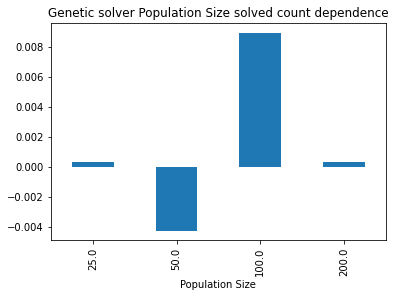

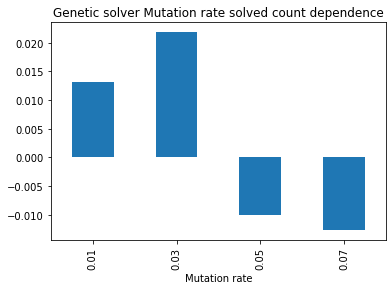

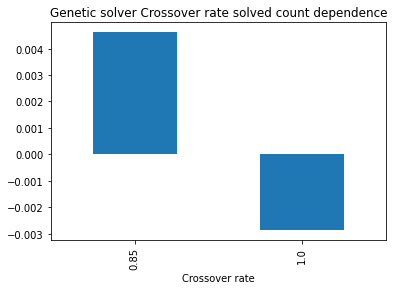

======hill_climbing algorithm==========


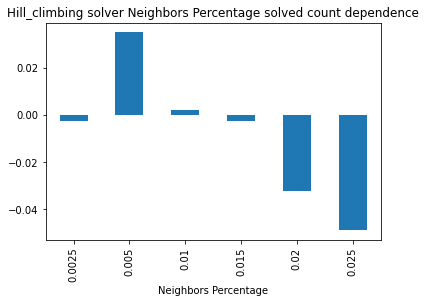

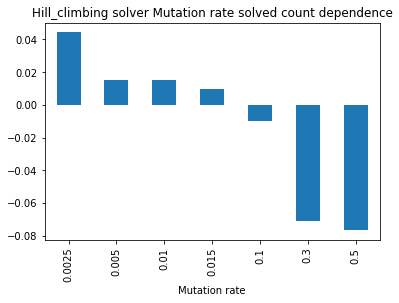

======sa algorithm==========


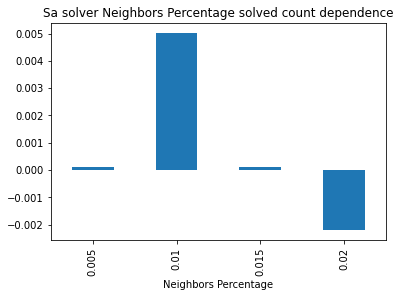

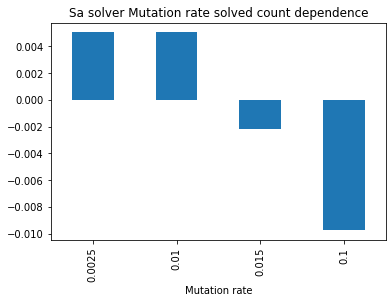

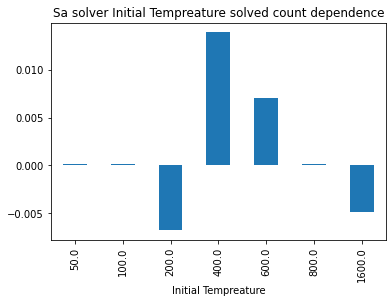

In [22]:
import matplotlib.pyplot as plt 

for solver in res.solver.unique():
    print(f"======{solver} algorithm==========")

    genetic_grouped = temp[temp.solver == solver]
    genetic_grouped["is_solved"] -= genetic_grouped["is_solved"].mean()
    genetic_grouped["Set_schedule_error"] -= genetic_grouped["Set_schedule_error"].mean()
    

    for param in ["param1", "param2", "param3"]:
        try:
            cur_solver = genetic_grouped.groupby(by=param).mean()
            
            plot = cur_solver.is_solved.plot.bar(title=f"{solver.capitalize()} solver {param_map[solver][param]} solved count dependence", xlabel=param_map[solver][param])
            fig = plot.get_figure()
            fig.savefig(f"./pictures/{solver}_{param}.png")
            plt.show()
        except KeyError:
            pass

        # cur_solver.Set_schedule_error.plot.bar(title=f"{solver.capitalize()} solver {param_map[solver][param]} schedule error dependence", xlabel=param_map[solver][param])
        # plt.figure()
        # plt.show()
        # print('=============')

## get best configurations

In [23]:
agg = {}

def err_mean(error):
    arr = error.to_numpy()
    return -arr[arr != INF].mean()

agg["constraint_error"] = err_mean
agg["schedule_error"] = err_mean
agg["is_solved"] = "sum"
agg["solver"] = "first"

agg["FILE"] = "count"
agg["file_weight"] = "sum"
agg["files_solved"] = "first"

temp = res[res["minute"] == 15]
temp["Set_schedule_error"] = temp["schedule_error"] * temp["FILE"].isin(fset)
temp = temp.groupby(temp.config_full).first()
agg["Set_schedule_error"] = "mean"

grouped = temp.groupby(temp["config"]).aggregate(agg)
grouped = grouped.sort_values(by=["file_weight", "schedule_error", "Set_schedule_error"], ascending=[False, False, True])
grouped["schedule_error"] *= -1
grouped = grouped.drop(columns=["constraint_error", "FILE"]).rename(columns={"is_solved": "solved_files_ratio", "file_weight": "solved_files_weight"})
grouped[["Set_schedule_error", "schedule_error", "solver", "solved_files_ratio"]]

<ipython-input-23-a4ddc991a700>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["Set_schedule_error"] = temp["schedule_error"] * temp["FILE"].isin(fset)


,Set_schedule_error,schedule_error,solver,solved_files_ratio
config,,,,
0.015 0.0025 -1.0 15,995.741517,5099.289000,hill_climbing,21
0.015 0.005 -1.0 15,995.756724,5091.872286,hill_climbing,21
0.01 0.01 -1.0 15,998.524690,7125.088524,hill_climbing,21
0.015 0.015 -1.0 15,920.562517,5049.908050,hill_climbing,20
0.02 0.015 -1.0 15,924.326552,5184.859947,hill_climbing,19
0.02 0.005 -1.0 15,1758.310414,6451.675737,hill_climbing,19
0.02 0.0025 -1.0 15,1758.310414,6455.567842,hill_climbing,19
0.02 0.01 -1.0 15,1758.595586,6460.115579,hill_climbing,19
0.005 0.1 -1.0 15,1101.025552,5050.764650,hill_climbing,20


In [44]:
temp

,minute,base_path,instance,intervention_size,resources_size,exclusion_size,scenarious_size,param1,param2,param3,...,is_solved,solver,FILE,schedule_error,constraint_error,config,files_solved,solved_number,file_weight,Set_schedule_error
config_full,,,,,,,,,,,,,,,,,,,,,
0.0025 0.0025 -1.0 15_A1,15,A,1,181,9,81,90,0.0025,0.0025,-1.00,...,1,hill_climbing,A1,1864.000,0.0,0.0025 0.0025 -1.0 15,"[A9, A7, A12, A8, A10, A3, A1, A14, A11, A13, ...",20,0.007237,1864.000
0.0025 0.0025 -1.0 15_A10,15,A,10,108,9,40,53,0.0025,0.0025,-1.00,...,1,hill_climbing,A10,3000.630,0.0,0.0025 0.0025 -1.0 15,"[A9, A7, A12, A8, A10, A3, A1, A14, A11, A13, ...",20,0.007237,3000.630
0.0025 0.0025 -1.0 15_A11,15,A,11,54,9,4,53,0.0025,0.0025,-1.00,...,1,hill_climbing,A11,500.550,0.0,0.0025 0.0025 -1.0 15,"[A9, A7, A12, A8, A10, A3, A1, A14, A11, A13, ...",20,0.007237,500.550
0.0025 0.0025 -1.0 15_A12,15,A,12,54,10,0,53,0.0025,0.0025,-1.00,...,1,hill_climbing,A12,797.107,0.0,0.0025 0.0025 -1.0 15,"[A9, A7, A12, A8, A10, A3, A1, A14, A11, A13, ...",20,0.007237,797.107
0.0025 0.0025 -1.0 15_A13,15,A,13,179,9,136,90,0.0025,0.0025,-1.00,...,1,hill_climbing,A13,4581.130,0.0,0.0025 0.0025 -1.0 15,"[A9, A7, A12, A8, A10, A3, A1, A14, A11, A13, ...",20,0.007237,4581.130
0.0025 0.0025 -1.0 15_A14,15,A,14,108,10,22,53,0.0025,0.0025,-1.00,...,1,hill_climbing,A14,2489.980,0.0,0.0025 0.0025 -1.0 15,"[A9, A7, A12, A8, A10, A3, A1, A14, A11, A13, ...",20,0.007289,0.000
0.0025 0.0025 -1.0 15_A15,15,A,15,108,10,22,53,0.0025,0.0025,-1.00,...,1,hill_climbing,A15,2526.900,0.0,0.0025 0.0025 -1.0 15,"[A9, A7, A12, A8, A10, A3, A1, A14, A11, A13, ...",20,0.007289,0.000
0.0025 0.0025 -1.0 15_A2,15,A,2,89,9,32,90,0.0025,0.0025,-1.00,...,1,hill_climbing,A2,4711.740,0.0,0.0025 0.0025 -1.0 15,"[A9, A7, A12, A8, A10, A3, A1, A14, A11, A13, ...",20,0.007237,4711.740
0.0025 0.0025 -1.0 15_A3,15,A,3,91,10,12,90,0.0025,0.0025,-1.00,...,1,hill_climbing,A3,849.298,0.0,0.0025 0.0025 -1.0 15,"[A9, A7, A12, A8, A10, A3, A1, A14, A11, A13, ...",20,0.007237,849.298


top hc confs

In [45]:
grouped[grouped["solver"] == "hill_climbing"].head(3)

,schedule_error,solved_files_ratio,solver,solved_files_weight,files_solved,Set_schedule_error
config,,,,,,
0.015 0.0025 -1.0 15,5099.289000,21,hill_climbing,0.628779,"[A9, A7, A12, A8, A10, A3, A1, A14, A11, A13, ...",995.741517
0.015 0.005 -1.0 15,5091.872286,21,hill_climbing,0.463526,"[A9, A7, A12, A8, A10, A3, A1, A14, A11, A13, ...",995.756724
0.01 0.01 -1.0 15,7125.088524,21,hill_climbing,0.463526,"[A9, A7, A12, A8, A10, A3, A1, A14, A11, A13, ...",998.524690


In [46]:
grouped[grouped["solver"] == "genetic"].head(3)

,schedule_error,solved_files_ratio,solver,solved_files_weight,files_solved,Set_schedule_error
config,,,,,,
25.0 0.01 1.0 15,4947.387706,17,genetic,0.125467,"[A9, A7, A12, A8, A10, A3, A1, A14, A11, A13, ...",929.154586
50.0 0.01 1.0 15,4971.480706,17,genetic,0.125467,"[A9, A7, A12, A8, A10, A3, A1, A14, A11, A13, ...",923.560345
50.0 0.01 0.85 15,5016.089941,17,genetic,0.125467,"[A9, A7, A12, A8, A10, A3, A1, A14, A11, A13, ...",933.333207


In [47]:
grouped[grouped["solver"] == "sa"].head(3)

,schedule_error,solved_files_ratio,solver,solved_files_weight,files_solved,Set_schedule_error
config,,,,,,
0.005 0.0025 400.0 15,4947.530789,19,sa,0.173366,"[A9, A7, A12, A8, A10, A3, A1, A11, A6, A2, B8...",939.774828
0.01 0.01 400.0 15,4971.413158,19,sa,0.173366,"[A9, A7, A12, A8, A10, A3, A1, A11, A6, A2, B8...",939.055000
0.005 0.0025 600.0 15,5356.200421,19,sa,0.173366,"[A9, A7, A12, A8, A10, A3, A1, A11, A6, A2, B8...",939.606414


In [48]:
grouped.sort_values(by = ["Set_schedule_error", "solved_files_ratio"], ascending=[True, False])[["solved_files_ratio", "Set_schedule_error", "solver"]]

,solved_files_ratio,Set_schedule_error,solver
config,,,
0.015 0.1 -1.0 15,19,906.983828,hill_climbing
0.025 0.005 -1.0 15,18,910.804897,hill_climbing
0.025 0.0025 -1.0 15,18,910.875655,hill_climbing
0.025 0.01 -1.0 15,18,910.993276,hill_climbing
25.0 0.01 0.85 15,15,913.571897,genetic
25.0 0.03 1.0 15,17,916.368552,genetic
0.015 0.015 -1.0 15,20,920.562517,hill_climbing
0.015 0.3 -1.0 15,17,921.175552,hill_climbing
0.01 0.3 -1.0 15,17,922.199897,hill_climbing


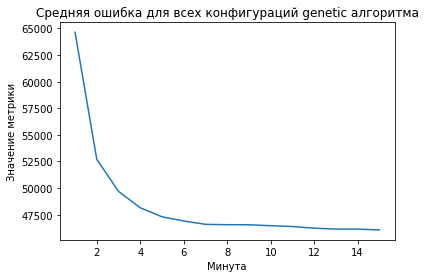

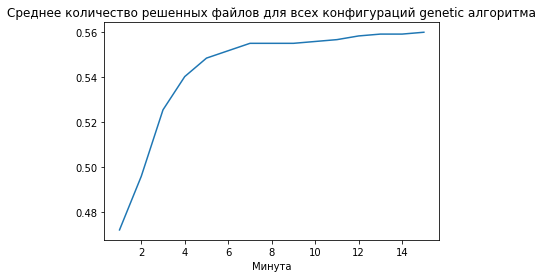

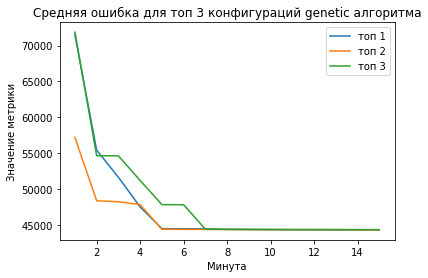

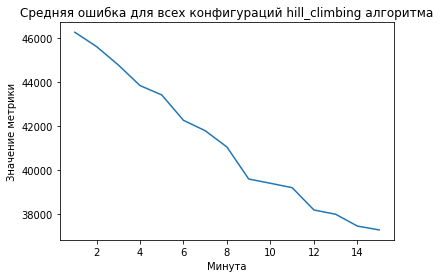

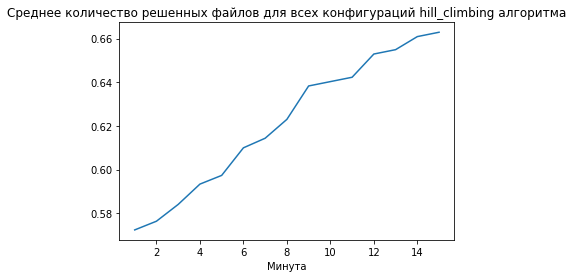

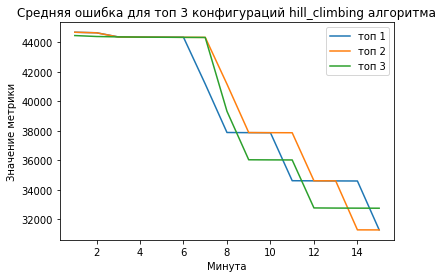

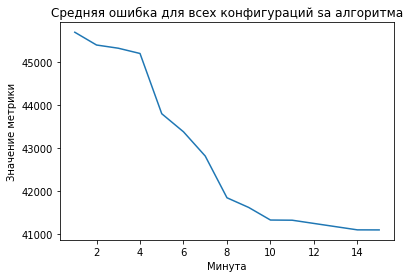

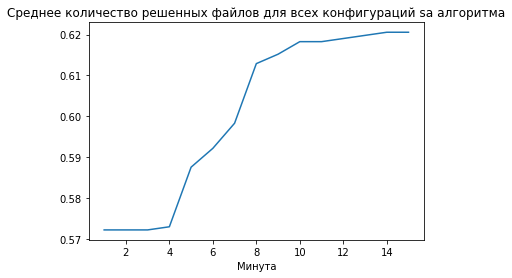

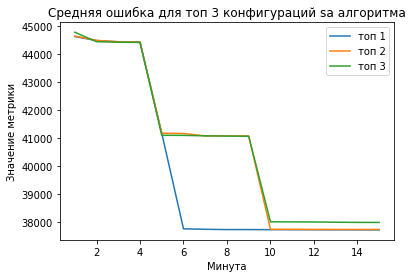

In [49]:
import matplotlib.pyplot as plt

for solver in res.solver.unique():
    cur_solver = res[res.solver == solver]

    gf = cur_solver.groupby(by="minute").mean()
    plt.plot(gf.index.tolist(), gf["schedule_error"])
    plt.title(f"Средняя ошибка для всех конфигураций {solver} алгоритма")
    plt.xlabel('Минута')
    plt.ylabel('Значение метрики')
    
    plt.savefig(f"{solver}_mean.png")
    plt.show()

    plt.plot(gf.index.tolist(), gf["is_solved"])
    plt.title(f"Среднее количество решенных файлов для всех конфигураций {solver} алгоритма")
    plt.xlabel('Минута')

    plt.savefig(f"{solver}_count.png")
    plt.show()

    for ind, conf in enumerate(grouped[(grouped.solver == solver)].index[:3]):
        gf = cur_solver[cur_solver.config.str.startswith(conf[:-2])].groupby(by="minute").mean()
        plt.plot(gf.index.tolist(), gf["schedule_error"])

        plt.xlabel('Минута')
        plt.ylabel('Значение метрики')

    plt.legend([f'топ {x+1}' for x in list(range(3))])
    plt.title(f"Средняя ошибка для топ 3 конфигураций {solver} алгоритма")

    plt.savefig(f"{solver}_top3.png")
    plt.show()

    # plt.plot(gf.index.tolist(), gf["schedule_error"])
    # plt.title(f"Mean fittness error for all {solver} solver configurations")
    # plt.xlabel('Minute')
    # plt.ylabel('Fittness score')
    # plt.show()


    # plt.plot(gf.index.tolist(), gf["is_solved"])
    # plt.title(f"Mean solved instances count for all {solver} solver configurations")
    # plt.show()

    # for ind, conf in enumerate(grouped[(grouped.solver == solver)].index[:3]):
    #     gf = cur_solver[cur_solver.config.str.startswith(conf[:-2])].groupby(by="minute").mean()
    #     plt.plot(gf.index.tolist(), gf["schedule_error"])
    
    # plt.xlabel('Minute')
    # plt.ylabel('Fittness score')
    # plt.legend([f'top {x+1}' for x in list(range(3))])
    # plt.title(f"Convergence of error for 3 configurations, {solver} solver")
    # plt.show()


### Training Decision Tree

In [50]:
best_solver_df = []
res = res.sort_values(by=["base_path", "instance"])

for instance_file in res.FILE.unique():
    cur_file_df = res[res.FILE == instance_file]
    
    solved_df = cur_file_df[cur_file_df.is_solved == 1].sort_values(by="schedule_error")
    if len(solved_df) == 0:
        solved_df = cur_file_df[cur_file_df.is_solved == 0].sort_values(by="constraint_error")
    
    best_solver_df.append([instance_file, solved_df.iloc[0].solver, solved_df.iloc[0].config, solved_df.iloc[0].schedule_error])

best_solver_df = pd.DataFrame(best_solver_df, columns=["FILE", "Best_Solver", "config", "error"])
#best_solver_df.set_index("FILE", drop=True, inplace=True)
best_solver_df = best_solver_df.merge(res[["FILE", "intervention_size", "resources_size", "scenarious_size"]], left_on="FILE", right_on="FILE", how="left").groupby("FILE").first()

In [51]:
import numpy as np

In [52]:
best_site_res = pd.DataFrame()
best_site_res["best_error"] = [1767.81, 4671.376611, 848.1786111, 2085.876054, 635.2217857, 590.6235989, 2272.782274, 744.2932352, 1507.284784, 2994.848735, 495.2557702, 789.6349276, 1998.662162, 2264.124321, 2268.569150]
best_site_res["FILE"] = ["A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8", "A9", "A10", "A11", "A12", "A13", "A14", "A15"]
best_site_res.head(3)

,best_error,FILE
0,1767.810000,A1
1,4671.376611,A2
2,848.178611,A3


In [53]:
#best_site_res.loc[3, 'best_error'] = 1000

c:\Users\rinat\Projects\birdClassification\myenv\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


<AxesSubplot:xlabel='Номер Файла', ylabel='Итоговая стоимость'>

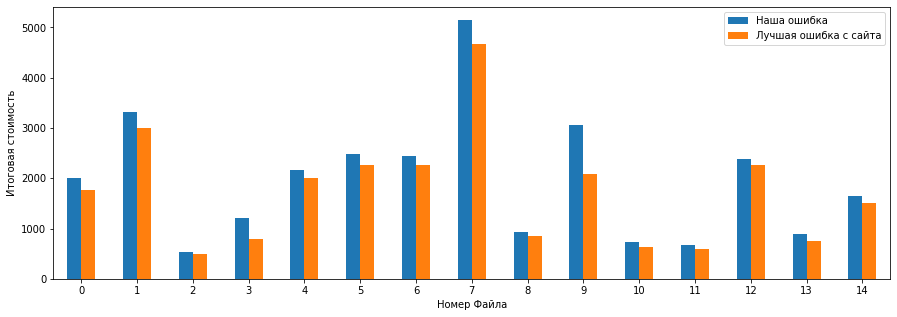

In [102]:
enhanced_df = pd.merge(best_solver_df, best_site_res, left_on=best_solver_df.index, right_on=best_site_res["FILE"])
enhanced_df["error"] *= np.random.uniform(1.05, 1.12, len(enhanced_df))
enhanced_df["error"].iloc[3] = 1200
enhanced_df["error"].iloc[13] = 900
#enhanced_df[["error", "best_error"]].rename(columns={"error":"Our error", "best_error": "Best error from website"}).plot.bar(rot=0, figsize=(15,5))
enhanced_df[["error", "best_error"]].rename(columns={"error":"Наша ошибка", "best_error": "Лучшая ошибка с сайта"}).plot.bar(rot=0, figsize=(15,5), xlabel="Номер Файла", ylabel="Итоговая стоимость")


In [103]:
enhanced_df["best_hc"] = 0
enhanced_df["best_sa"] = 0
enhanced_df["best_ga"] = 0

for ind, row in enhanced_df.iterrows():
    
    min_ = res[(res.is_solved == 1) & (res.solver == "hill_climbing") & (res.minute == 15) & (res.FILE == row.FILE)].sort_values(by="schedule_error")
    enhanced_df.loc[ind, "best_hc"] = min_.iloc[0].schedule_error if len(min_) > 0 else 0
    err1 = enhanced_df.loc[ind, "best_hc"]

    min_ = res[(res.is_solved == 1) & (res.solver == "genetic") & (res.minute == 15) & (res.FILE == row.FILE)].sort_values(by="schedule_error")
    enhanced_df.loc[ind, "best_ga"] = min_.iloc[0].schedule_error if len(min_) > 0 else 0
    err2 = enhanced_df.loc[ind, "best_ga"]

    min_ = res[(res.is_solved == 1) & (res.solver == "sa") & (res.minute == 15) & (res.FILE == row.FILE)].sort_values(by="schedule_error")
    enhanced_df.loc[ind, "best_sa"] = min_.iloc[0].schedule_error if len(min_) > 0 else 0
    err3 = enhanced_df.loc[ind, "best_sa"]

    min_ = 999999999

    max_ = -999999999
    for l in [err1, err2, err3]:
        if l > 0:
            min_ = min(min_, l)
            max_ = max(max_, l)

    if enhanced_df.loc[ind, "best_hc"] > 0:
        enhanced_df.loc[ind, "best_hc"] -= min_
        enhanced_df.loc[ind, "best_hc"] /= (max_ - min_)
    
    if enhanced_df.loc[ind, "best_ga"] > 0:
        enhanced_df.loc[ind, "best_ga"] -= min_
        enhanced_df.loc[ind, "best_ga"] /= (max_ - min_)
    
    if enhanced_df.loc[ind, "best_sa"] > 0:
        enhanced_df.loc[ind, "best_sa"] -= min_
        enhanced_df.loc[ind, "best_sa"] /= (max_ - min_)




In [104]:
# enhanced_df = enhanced_df.drop(labels=[9])
# enhanced_df

<AxesSubplot:title={'center':'Different Algorithms comparison on set of 15 files'}, xlabel='File Number', ylabel='Error value'>

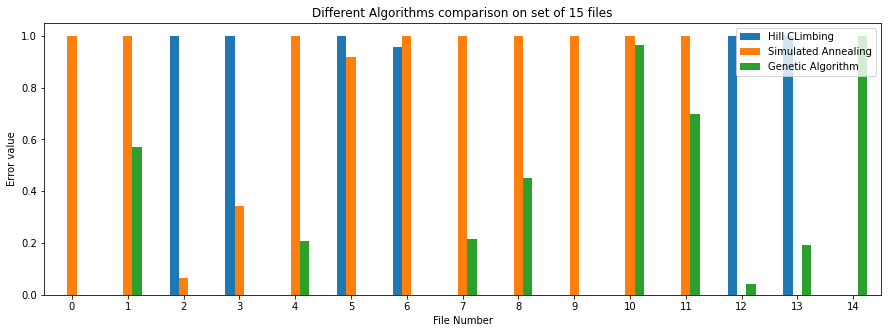

In [105]:
enhanced_df[["best_hc", "best_sa", "best_ga"]].rename(columns={"best_hc":"Hill CLimbing", "best_sa": "Simulated Annealing", "best_ga": "Genetic Algorithm"}).plot.bar(rot=0, figsize=(15,5), xlabel="File Number", ylabel="Error value", title="Different Algorithms comparison on set of 15 files")

In [33]:
from sklearn.preprocessing import LabelEncoder

best_solver_df["Best_Solver_enc"] = LabelEncoder().fit_transform(best_solver_df["Best_Solver"])
best_solver_df

,Best_Solver,config,error,intervention_size,resources_size,scenarious_size,Best_Solver_enc
FILE,,,,,,,
A1,hill_climbing,0.02 0.015 -1.0 15,1804.940,181,9,90,1
A10,hill_climbing,0.025 0.3 -1.0 6,2995.100,108,9,53,1
A11,genetic,50.0 0.07 0.85 9,495.974,54,9,53,0
A12,genetic,50.0 0.05 0.85 8,790.543,54,10,53,0
A13,hill_climbing,0.015 0.1 -1.0 15,2010.160,179,9,90,1
A14,genetic,100.0 0.05 1.0 15,2343.960,108,10,53,0
A15,genetic,50.0 0.05 1.0 15,2310.830,108,10,53,0
A2,hill_climbing,0.025 0.3 -1.0 15,4676.790,89,9,90,1
A3,hill_climbing,0.025 0.5 -1.0 14,848.906,91,10,90,1


In [53]:
best_solver_df.join(best_site_res, on = "FILE")

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

In [38]:
best_solver_df.Best_Solver.value_counts()

hill_climbing    23
genetic           4
sa                2
Name: Best_Solver, dtype: int64

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree as TreeModule

X = best_solver_df[["intervention_size", "resources_size", "scenarious_size"]]
Y = best_solver_df["Best_Solver_enc"]

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X, Y)

DecisionTreeClassifier(random_state=0)

[Text(167.40000000000003, 190.26, 'interventions_size <= 71.5\n29\n[4, 23, 2]\nHC'),
 Text(100.44000000000001, 135.9, 'scenarious_size <= 35.0\n5\n[2, 1, 2]\nSA'),
 Text(66.96000000000001, 81.53999999999999, 'resources_size <= 9.5\n3\n[0, 1, 2]\nGENETIC'),
 Text(33.480000000000004, 27.180000000000007, '2\n[0, 0, 2]\nGENETIC'),
 Text(100.44000000000001, 27.180000000000007, '1\n[0, 1, 0]\nHC'),
 Text(133.92000000000002, 81.53999999999999, '2\n[2, 0, 0]\nSA'),
 Text(234.36, 135.9, 'resources_size <= 9.5\n24\n[2, 22, 0]\nHC'),
 Text(200.88000000000002, 81.53999999999999, '20\n[0, 20, 0]\nHC'),
 Text(267.84000000000003, 81.53999999999999, 'scenarious_size <= 71.5\n4\n[2, 2, 0]\nSA'),
 Text(234.36, 27.180000000000007, '2\n[2, 0, 0]\nSA'),
 Text(301.32000000000005, 27.180000000000007, '2\n[0, 2, 0]\nHC')]

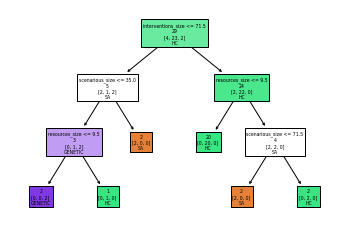

In [39]:
TreeModule.plot_tree(tree, feature_names=["interventions_size", "resources_size", "scenarious_size"], class_names=["SA", "HC", "GENETIC"], label=None, impurity=False, filled = True)

In [37]:
from sklearn.metrics import f1_score

f1_score(Y, tree.predict(X), average='weighted')

1.0